# ML Basics with Keras - Basic Classification (2)
Source: https://www.tensorflow.org/tutorials/keras/classification

In [31]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = keras.datasets.mnist

(train_in, train_out), (test_in, test_out) = data.load_data()

In [13]:
print(train_in.shape[1:])
print(test_in.shape)
print(train_out)

(28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]


In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=train_in.shape[1:]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10)
])

In [60]:
model.compile(optimizer="adam", 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=["accuracy"])

In [61]:
model.fit(train_in, train_out, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 899us/step - loss: 2.4068 - accuracy: 0.8492
Epoch 2/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.3722 - accuracy: 0.9084
Epoch 3/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.2840 - accuracy: 0.9281
Epoch 4/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.2384 - accuracy: 0.9379
Epoch 5/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.2240 - accuracy: 0.9446
Epoch 6/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.2068 - accuracy: 0.9487
Epoch 7/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.1997 - accuracy: 0.9518
Epoch 8/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.1883 - accuracy: 0.9532
Epoch 9/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.1819 - accuracy: 0.9559
Epoch 10/10
1875/1875 [==============================] - 2s 894u

In [62]:
model.evaluate(test_in, test_out)

313/313 [==============================] - 0s 632us/step - loss: 0.2398 - accuracy: 0.9500


[0.23980827629566193, 0.949999988079071]

In [74]:
prob_model = keras.Sequential([
    model, 
    keras.layers.Softmax()
])
predictions = prob_model.predict(test_in)

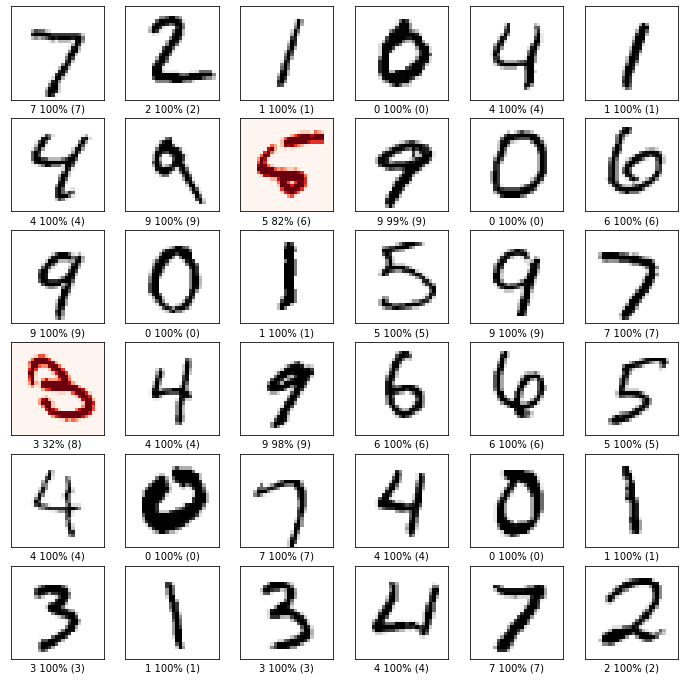

In [75]:
plt.figure(figsize=(12,12))
for i in range(36):
    if test_out[i] != np.argmax(predictions[i]): color = 'Reds'
    else: color = 'binary'
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_in[i], cmap=color)
    plt.xlabel("{} {:2.0f}% ({})".format(test_out[i], 100*np.max(predictions[i]), np.argmax(predictions[i])))